In [605]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

beer = 'Python/beer/beers.csv'
breweries = 'Python/beer/breweries.csv'

In [431]:
df_beer = pd.read_csv(beer)
df_breweries = pd.read_csv(breweries)

print(df_beer.head())
print(df_breweries.head())

   Unnamed: 0    abv  ibu    id                 name  \
0           0  0.050  NaN  1436             Pub Beer   
1           1  0.066  NaN  2265          Devil's Cup   
2           2  0.071  NaN  2264  Rise of the Phoenix   
3           3  0.090  NaN  2263             Sinister   
4           4  0.075  NaN  2262        Sex and Candy   

                            style  brewery_id  ounces  
0             American Pale Lager         408    12.0  
1         American Pale Ale (APA)         177    12.0  
2                    American IPA         177    12.0  
3  American Double / Imperial IPA         177    12.0  
4                    American IPA         177    12.0  
   Unnamed: 0                       name           city state
0           0         NorthGate Brewing     Minneapolis    MN
1           1  Against the Grain Brewery     Louisville    KY
2           2   Jack's Abby Craft Lagers     Framingham    MA
3           3  Mike Hess Brewing Company      San Diego    CA
4           4    

In [432]:
#Let's merge the two dataframes and remove redundant index columns
df = df_beer.merge(df_breweries, left_on='brewery_id', right_index=True)

In [433]:
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [434]:
df = df.rename(columns = {"name_x":"beer", "name_y":"brewery"})
df.head()

,abv,ibu,id,beer,style,brewery_id,ounces,brewery,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [435]:
df.info()
2410-1405
#we have 1005 missing values for ibu
#potential solution: fill in missing values with median of respective beer style

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 10 columns):
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
beer          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
brewery       2410 non-null object
city          2410 non-null object
state         2410 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 207.1+ KB


1005

In [436]:
print(df[df['state'] == 'CO'])
#for some reason I can't subset dataframe by state values.. 

Empty DataFrame
Columns: [abv, ibu, id, beer, style, brewery_id, ounces, brewery, city, state]
Index: []


In [437]:
for i in range(5):
    print(df.iloc[i,9],';length of value:',len(df.iloc[i,9]))
#it turns out that each state has a space before it

 OR ;length of value: 3
 IN ;length of value: 3
 IN ;length of value: 3
 IN ;length of value: 3
 IN ;length of value: 3


In [438]:
#let's remove the spaces with an apply function
def remove_space(value):
    if value[0] == ' ':
        value = value[1:]
        return value
    else:
        return value

df['state'] = df['state'].apply(remove_space)

In [439]:
df[df['state'] == 'CA'].head()

,abv,ibu,id,beer,style,brewery_id,ounces,brewery,city,state
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0,21st Amendment Brewery,San Francisco,CA
20,0.082,NaN,1592,He Said Belgian-Style Tripel,Tripel,368,12.0,21st Amendment Brewery,San Francisco,CA
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,21st Amendment Brewery,San Francisco,CA
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,21st Amendment Brewery,San Francisco,CA
23,0.079,NaN,976,Marooned On Hog Island,American Stout,368,12.0,21st Amendment Brewery,San Francisco,CA


In [440]:
#let's find the most alcoholic beers...
#first let's make abv represent a percentage:
df['abv'] = df['abv']*100

In [441]:
highabv = df[['abv','beer', 'style', 'brewery', 'city', 'state']].sort_values('abv', ascending = False)
#highabv = highabv.dropna()

In [442]:
highabv[highabv['state'] == 'CA'].head(10)

,abv,beer,style,brewery,city,state
2160,9.9,Double Trunk,American Double / Imperial IPA,The Dudes' Brewing Company,Torrance,CA
1268,9.9,Chaotic Double IPA,American Double / Imperial IPA,Manzanita Brewing Company,Santee,CA
1045,9.9,Ex Umbris Rye Imperial Stout,American Double / Imperial Stout,Hess Brewing Company,San Diego,CA
21,9.9,Lower De Boom,American Barleywine,21st Amendment Brewery,San Francisco,CA
32,9.7,Hop Crisis,American Double / Imperial IPA,21st Amendment Brewery,San Francisco,CA
1271,9.5,Gillespie Brown Ale,American Brown Ale,Manzanita Brewing Company,Santee,CA
579,9.5,Terrace Hill Double IPA,American Double / Imperial IPA,Central Coast Brewing Company,San Luis Obispo,CA
894,9.4,Better Weather IPA,American IPA,Golden Road Brewing,Los Angeles,CA
1377,9.2,Shipwrecked Double IPA,American Double / Imperial IPA,Mission Brewery,San Diego,CA
1807,8.9,Giant DIPA,American Double / Imperial IPA,Santa Cruz Mountain Brewing,Santa Cruz,CA


In [443]:
#which breweries have the largest number of beers?
df.brewery.value_counts()[:10]

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: brewery, dtype: int64

In [444]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,5.977342,42.713167,1431.113278,231.749793,13.592241
std,1.354173,25.954066,752.459975,157.685604,2.352204
min,0.100000,4.000000,1.000000,0.000000,8.400000
25%,5.000000,21.000000,808.250000,93.000000,12.000000
50%,5.600000,35.000000,1453.500000,205.000000,12.000000
75%,6.700000,64.000000,2075.750000,366.000000,16.000000
max,12.800000,138.000000,2692.000000,557.000000,32.000000


In [445]:
df.beer.value_counts()[:10]
#why would there be duplicates of a beer?

Nonstop Hef Hop           12
Dale's Pale Ale            6
Oktoberfest                6
Longboard Island Lager     4
Dagger Falls IPA           3
Boston Lager               3
1327 Pod's ESB             3
312 Urban Pale Ale         2
Bombshell Blonde           2
The Deuce                  2
Name: beer, dtype: int64

In [446]:
df[df['beer'] == "Nonstop Hef Hop"]
#in this case, it looks like they are all duplicates

,abv,ibu,id,beer,style,brewery_id,ounces,brewery,city,state
1075,3.9,20.0,2400,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1076,3.9,20.0,2399,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1077,3.9,20.0,2398,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1078,3.9,20.0,2397,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1079,3.9,20.0,2396,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1080,3.9,20.0,2395,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1081,3.9,20.0,2394,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1082,3.9,20.0,2393,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1083,3.9,20.0,2392,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR
1084,3.9,20.0,2391,Nonstop Hef Hop,American Pale Wheat Ale,80,16.0,Hopworks Urban Brewery,Portland,OR


In [447]:
df[df['beer'] == "Dale's Pale Ale"]
#here we have the same beer, but in different volumes and breweries

,abv,ibu,id,beer,style,brewery_id,ounces,brewery,city,state
1559,6.5,65.0,1444,Dale's Pale Ale,American Pale Ale (APA),166,12.0,Oskar Blues Brewery,Longmont,CO
1560,6.5,65.0,1252,Dale's Pale Ale,American Pale Ale (APA),166,12.0,Oskar Blues Brewery,Longmont,CO
1564,6.5,65.0,955,Dale's Pale Ale,American Pale Ale (APA),166,19.2,Oskar Blues Brewery,Longmont,CO
1583,6.5,65.0,1,Dale's Pale Ale,American Pale Ale (APA),166,12.0,Oskar Blues Brewery,Longmont,CO
1601,6.5,65.0,1166,Dale's Pale Ale,American Pale Ale (APA),389,19.2,Oskar Blues Brewery (North Carol...,Brevard,NC
1602,6.5,65.0,1065,Dale's Pale Ale,American Pale Ale (APA),389,12.0,Oskar Blues Brewery (North Carol...,Brevard,NC


In [448]:
df[df['beer'] == "Oktoberfest"]
#here we have beeres that differ by ounce and brewery
#it is interesting to note that their abv and ibu vary even though they are all the same beer/style
#this shows the difference between breweries

,abv,ibu,id,beer,style,brewery_id,ounces,brewery,city,state
590,5.5,40.0,2079,Oktoberfest,Märzen / Oktoberfest,226,16.0,Chatham Brewing,Chatham,NY
602,5.5,NaN,2011,Oktoberfest,Märzen / Oktoberfest,141,12.0,Cigar City Brewing Company,Tampa,FL
974,5.9,25.0,539,Oktoberfest,Märzen / Oktoberfest,365,16.0,Great River Brewery,Davenport,IA
1098,6.0,NaN,2383,Oktoberfest,Märzen / Oktoberfest,120,16.0,Horny Goat Brew Pub,Milwaukee,WI
1744,6.2,NaN,2373,Oktoberfest,Märzen / Oktoberfest,43,12.0,Rivertowne Brewing Company,Export,PA
1789,5.5,NaN,1995,Oktoberfest,Märzen / Oktoberfest,30,12.0,SanTan Brewing Company,Chandler,AZ


In [449]:
df = df.drop_duplicates(subset=['abv', 'ibu', 'beer', 'style', 'brewery_id','ounces'], keep='first')
#i excluded 'id' from the subset since all ids are unique
#brewery/city/state were also not included since they are each unique to brewery_id

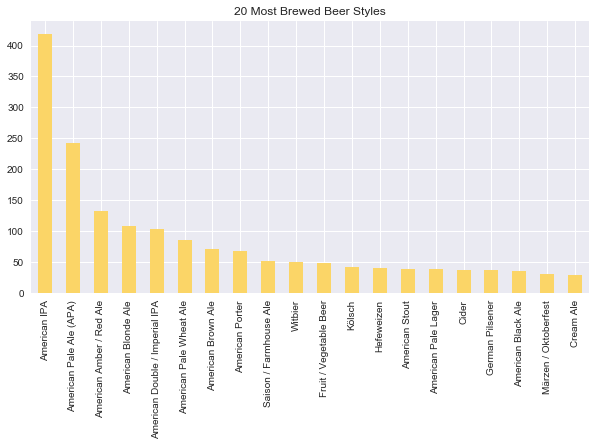

In [450]:
df['style'].value_counts()[:20].plot(kind='bar', figsize=(10,5), color="#fbd567")
plt.title('20 Most Brewed Beer Styles')
#plt.xticks(rotation=85)
plt.show()

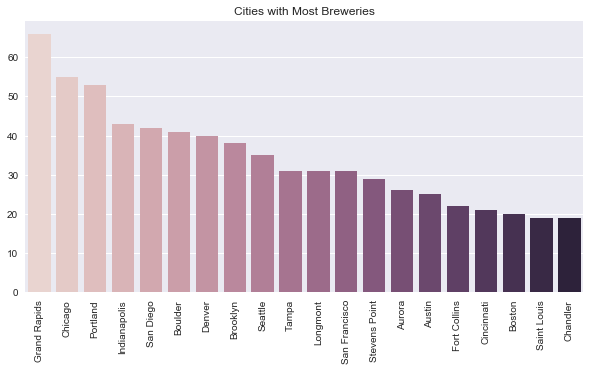

In [495]:
brewery_city = pd.DataFrame(df['city'].value_counts())
brewery_city = brewery_city.reset_index()
#brewery_city.rename(columns = {"index":"city", "city":"count"})
y = brewery_city['city'][:20]
x = brewery_city['index'][:20]
plt.figure(figsize=(10,5))
sns.barplot(y = y, x = x,palette = sns.cubehelix_palette(len(x)))
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('')
plt.title('Cities with Most Breweries')
plt.show()

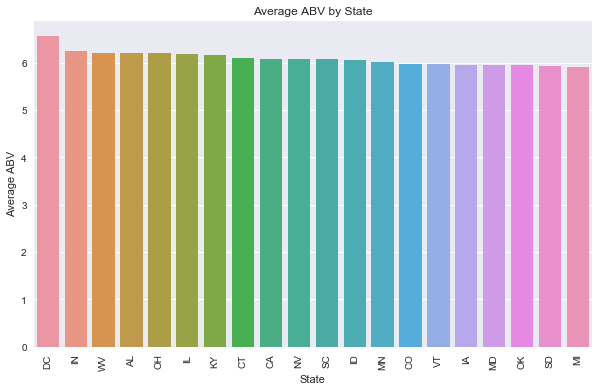

In [635]:
abv_state = pd.DataFrame(df.loc[:,['state', 'abv']])

state = list(abv_state['state'].unique())
avg_abv = []

for i in state:
    x = abv_state[abv_state['state'] == i]
    state_mean = np.nansum(x['abv'])/len(x)
    avg_abv.append(state_mean)

#print(state[:10])
#print(avg_abv[:10])
plt.figure(figsize=(10,6))
data = pd.DataFrame({'state': state, 'avg_abv': avg_abv})
data = data.sort_values('avg_abv',ascending=False)
y = data['avg_abv'][:20]
x = data['state'][:20]
sns.barplot(y = y, x = x)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average ABV')
plt.title('Average ABV by State')
